Problem 5

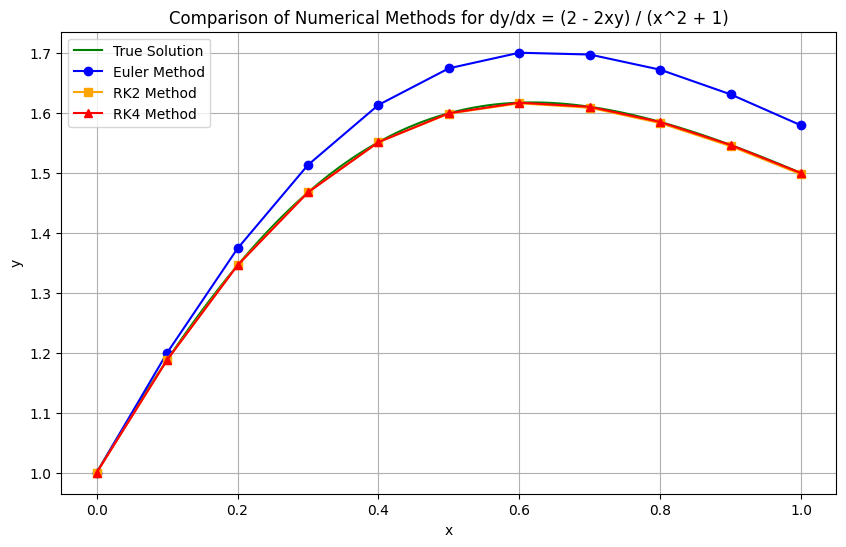

Relative Errors (in percentage):
x-values	Euler Method	RK2 Method	RK4 Method
0.0		0.0000		0.0000		0.0000
0.1		1.0000		0.0345		0.0000
0.2		2.0877		0.0403		0.0000
0.3		3.1214		0.0247		0.0000
0.4		4.0051		0.0039		0.0001
0.5		4.6865		0.0373		0.0001
0.6		5.1518		0.0693		0.0001
0.7		5.4148		0.0961		0.0001
0.8		5.5054		0.1163		0.0001
0.9		5.4591		0.1297		0.0001
1.0		5.3113		0.1372		0.0001


In [4]:
import numpy as np
import matplotlib.pyplot as plt


def f(x, y):
    return (2 - 2 * x * y) / (x**2 + 1)

def true_solution(x):
    return (2 * x + 1) / (x**2 + 1)

def euler_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0
    for i in range(1, len(x_values)):
        y_values[i] = y_values[i-1] + h * f(x_values[i-1], y_values[i-1])
    return x_values, y_values


def rk2_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0
    for i in range(1, len(x_values)):
        k1 = h * f(x_values[i-1], y_values[i-1])
        k2 = h * f(x_values[i-1] + 0.5 * h, y_values[i-1] + 0.5 * k1)
        y_values[i] = y_values[i-1] + k2
    return x_values, y_values


def rk4_method(f, x0, y0, h, x_end):
    x_values = np.arange(x0, x_end + h, h)
    y_values = np.zeros(len(x_values))
    y_values[0] = y0
    for i in range(1, len(x_values)):
        k1 = h * f(x_values[i-1], y_values[i-1])
        k2 = h * f(x_values[i-1] + 0.5 * h, y_values[i-1] + 0.5 * k1)
        k3 = h * f(x_values[i-1] + 0.5 * h, y_values[i-1] + 0.5 * k2)
        k4 = h * f(x_values[i-1] + h, y_values[i-1] + k3)
        y_values[i] = y_values[i-1] + (k1 + 2*k2 + 2*k3 + k4) / 6
    return x_values, y_values

x0 = 0
y0 = 1
h = 0.1
x_end = 1

x_euler, y_euler = euler_method(f, x0, y0, h, x_end)
x_rk2, y_rk2 = rk2_method(f, x0, y0, h, x_end)
x_rk4, y_rk4 = rk4_method(f, x0, y0, h, x_end)


x_true = np.linspace(x0, x_end, 100)
y_true = true_solution(x_true)


plt.figure(figsize=(10, 6))
plt.plot(x_true, y_true, label='True Solution', color='green')
plt.plot(x_euler, y_euler, label='Euler Method', color='blue', marker='o')
plt.plot(x_rk2, y_rk2, label='RK2 Method', color='orange', marker='s')
plt.plot(x_rk4, y_rk4, label='RK4 Method', color='red', marker='^')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison of Numerical Methods for dy/dx = (2 - 2xy) / (x^2 + 1)')
plt.legend()
plt.grid(True)
plt.show()


y_true_euler = true_solution(x_euler)
y_true_rk2 = true_solution(x_rk2)
y_true_rk4 = true_solution(x_rk4)

rel_error_euler = np.abs((y_true_euler - y_euler) / y_true_euler) * 100
rel_error_rk2 = np.abs((y_true_rk2 - y_rk2) / y_true_rk2) * 100
rel_error_rk4 = np.abs((y_true_rk4 - y_rk4) / y_true_rk4) * 100

print("Relative Errors (in percentage):")
print("x-values\tEuler Method\tRK2 Method\tRK4 Method")
for i in range(len(x_euler)):
    print(f"{x_euler[i]:.1f}\t\t{rel_error_euler[i]:.4f}\t\t{rel_error_rk2[i]:.4f}\t\t{rel_error_rk4[i]:.4f}")